# Importing libraries and Data Set

In [3]:
# import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [4]:
# assign path
path = r'C:\Users\shaiv\Downloads\Instacart Basket Analysis'
path

'C:\\Users\\shaiv\\Downloads\\Instacart Basket Analysis'

In [7]:
# import data set
ords_prods_custs = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_custs_excluded.pkl'))

In [9]:
# Remove rows where 'region' is NaN or blank (Unable to do in Part1A due to memory error)
ords_prods_custs = ords_prods_custs[ords_prods_custs['region'].notna() & (ords_prods_custs['region'] != '')]

# 05 and 06 Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. Create an appropriate visualization to show the distribution of profiles.

### Grouping based on Income

In [13]:
# Create an income group variable
ords_prods_custs.loc[ords_prods_custs['Income'] <= 55000, 'income_group'] = 'low-income'
ords_prods_custs.loc[(ords_prods_custs['Income'] > 55000) & (ords_prods_custs['Income'] <= 150000), 'income_group'] = 'middle-income'
ords_prods_custs.loc[ords_prods_custs['Income'] > 150000, 'income_group'] = 'high-income'

In [15]:
# Counting income groups
ords_prods_custs['income_group'].value_counts(dropna = False)

income_group
middle-income    22170039
low-income        4365613
high-income       3819558
Name: count, dtype: int64

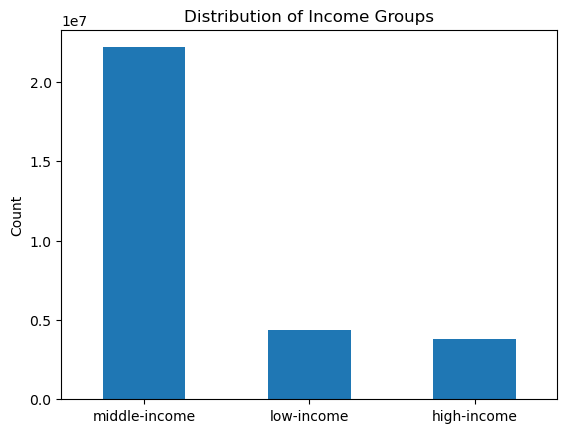

In [17]:
# Bar chart representing income groups
bar = ords_prods_custs['income_group'].value_counts().plot.bar()
plt.title('Distribution of Income Groups')
plt.xlabel('')
plt.ylabel('Count')
plt.xticks(rotation = 0)
plt.show()

In [18]:
# Exporting bar chart
bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'distribution_of_income_groups_bar_chart.png'))

### Grouping based on Age

In [22]:
# Create an age group variable
ords_prods_custs.loc[ords_prods_custs['Age'] <= 25, 'age_group'] = 'young-adult'
ords_prods_custs.loc[(ords_prods_custs['Age'] > 25) & (ords_prods_custs['Age'] <= 44), 'age_group'] = 'adult'
ords_prods_custs.loc[(ords_prods_custs['Age'] > 44) & (ords_prods_custs['Age'] <= 64), 'age_group'] = 'middle-aged'
ords_prods_custs.loc[ords_prods_custs['Age'] > 64, 'age_group'] = 'senior'

In [23]:
# Counting age groups
ords_prods_custs['age_group'].value_counts(dropna = False)

age_group
middle-aged    9513751
adult          9026380
senior         8026883
young-adult    3788196
Name: count, dtype: int64

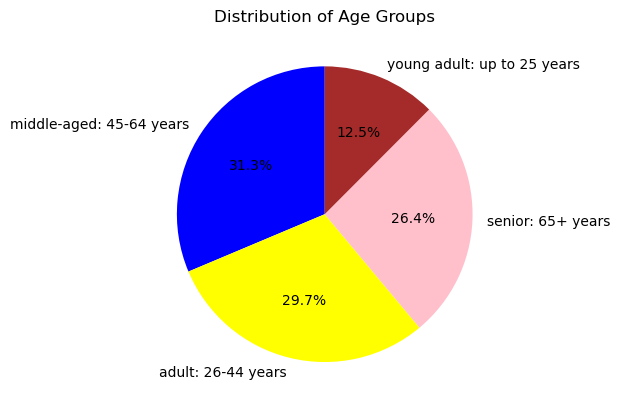

In [24]:
# Pie chart representing age groups
pie_chart = ords_prods_custs['age_group'].value_counts(dropna = False).plot.pie(autopct = '%1.1f%%', labels = ['middle-aged: 45-64 years', 'adult: 26-44 years', 'senior: 65+ years', 'young adult: up to 25 years'], startangle = 90, colors = ['blue', 'yellow', 'pink', 'brown'])
plt.ylabel('')
plt.title('Distribution of Age Groups')
plt.show()                                                                                

In [26]:
# Exporting pie chart
pie_chart.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'distribution_of_age_groups_pie_chart.png'))

### Grouping based on dependants

In [31]:
# Create a dependants flag
ords_prods_custs.loc[ords_prods_custs['Number of dependents'] == 0, 'dependant_flag'] = 'no dependants'
ords_prods_custs.loc[ords_prods_custs['Number of dependents'] >= 1, 'dependant_flag'] = 'has dependants'

In [32]:
# Counting dependants
ords_prods_custs['dependant_flag'].value_counts(dropna = False)

dependant_flag
has dependants    22780689
no dependants      7574521
Name: count, dtype: int64

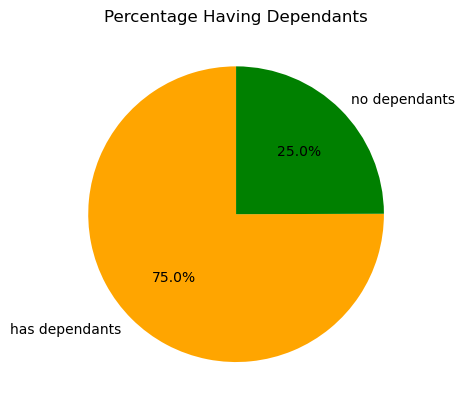

In [33]:
# Pie chart representing dependants
pie_chart2 = ords_prods_custs['dependant_flag'].value_counts(dropna = False).plot.pie(autopct = '%1.1f%%', labels = ['has dependants', 'no dependants'], startangle = 90, colors = ['orange', 'green'])
plt.ylabel('')
plt.title('Percentage Having Dependants')
plt.show()

In [35]:
# Exporting pie chart
pie_chart2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'percentage_having_dependants_pie_chart.png'))

### Loyalty vs Age Group

In [40]:
# Crosstab loyalty with age group
loyalty_age_crosstab = pd.crosstab(ords_prods_custs['loyalty_flag'], ords_prods_custs['age_group'], dropna = False)
loyalty_age_crosstab

age_group,adult,middle-aged,senior,young-adult
loyalty_flag,,,,
Loyal customer,2983512,3181804,2663487,1254874
New customer,1389882,1479638,1253556,587925
Regular customer,4652986,4852309,4109840,1945397


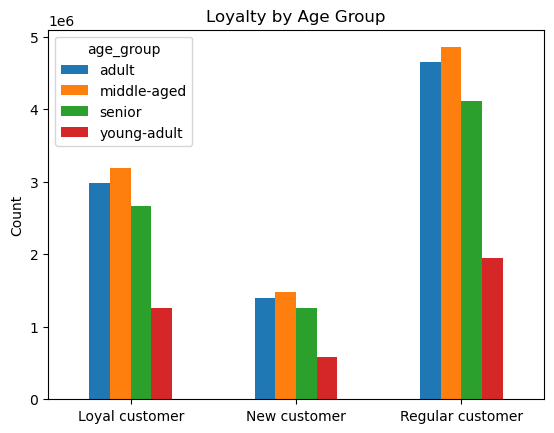

In [41]:
# Bar chart for loyalty by age group
loyalty_age_bar_chart = loyalty_age_crosstab.plot.bar()
plt.title('Loyalty by Age Group')
plt.xlabel('')
plt.ylabel('Count')
plt.xticks(rotation = 0)
plt.show()

In [42]:
# Export the chart
loyalty_age_bar_chart.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_age_bar_chart.png'))

### Spending vs Age Group

In [44]:
# Crosstab spending with age group
spending_age_crosstab = pd.crosstab(ords_prods_custs['spender_flag'], ords_prods_custs['age_group'], dropna = False)
spending_age_crosstab

age_group,adult,middle-aged,senior,young-adult
spender_flag,,,,
High_spender,27588,30457,26016,11270
Low_spender,8998792,9483294,8000867,3776926


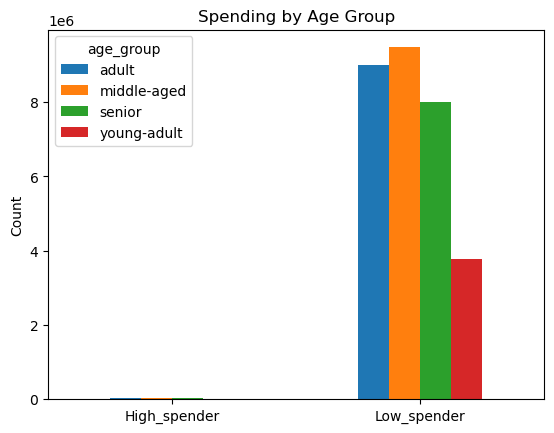

In [45]:
# Bar chart for spending by age group
spending_age_bar_chart = spending_age_crosstab.plot.bar()
plt.title('Spending by Age Group')
plt.xlabel('')
plt.ylabel('Count')
plt.xticks(rotation = 0)
plt.show()

In [46]:
# Export the chart
spending_age_bar_chart.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'spending_age_bar_chart.png'))

### Spending by Region with low activity customers excluded

In [48]:
# Crosstab region to spending flag
region_spending_crosstab = pd.crosstab(ords_prods_custs['region'], ords_prods_custs['spender_flag'], dropna = False)
region_spending_crosstab

spender_flag,High_spender,Low_spender
region,,
Midwest,24085,7237428
Northeast,15058,5449627
South,31149,9670636
West,25039,7902188


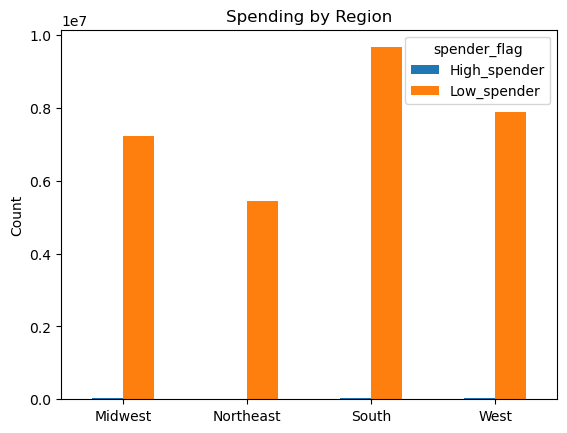

In [49]:
# Bar chart for spending by region
region_spending_bar_chart = region_spending_crosstab.plot.bar()
plt.title('Spending by Region')
plt.xlabel('')
plt.ylabel('Count')
plt.xticks(rotation = 0)
plt.show()

In [50]:
# Export the chart
region_spending_bar_chart.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'region_spending_bar_chart.png'))

### Orders by Department

In [52]:
# Import departments dataframe
dept = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'))
dept

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [53]:
# Changing header name to department_id
dept.rename(columns={'Unnamed: 0': 'department_id'}, inplace=True)
dept

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [57]:
# Assigning department to department_id
ords_prods_custs.loc[ords_prods_custs['department_id'] == 1, 'department'] = 'frozen'
ords_prods_custs.loc[ords_prods_custs['department_id'] == 2, 'department'] = 'other'
ords_prods_custs.loc[ords_prods_custs['department_id'] == 3, 'department'] = 'bakery'
ords_prods_custs.loc[ords_prods_custs['department_id'] == 4, 'department'] = 'produce'
ords_prods_custs.loc[ords_prods_custs['department_id'] == 5, 'department'] = 'alcohol'
ords_prods_custs.loc[ords_prods_custs['department_id'] == 6, 'department'] = 'international'
ords_prods_custs.loc[ords_prods_custs['department_id'] == 7, 'department'] = 'beverages'
ords_prods_custs.loc[ords_prods_custs['department_id'] == 8, 'department'] = 'pets'
ords_prods_custs.loc[ords_prods_custs['department_id'] == 9, 'department'] = 'dry goods pasta'
ords_prods_custs.loc[ords_prods_custs['department_id'] == 10, 'department'] = 'bulk'
ords_prods_custs.loc[ords_prods_custs['department_id'] == 11, 'department'] = 'personal care'
ords_prods_custs.loc[ords_prods_custs['department_id'] == 12, 'department'] = 'meat seafood'
ords_prods_custs.loc[ords_prods_custs['department_id'] == 13, 'department'] = 'pantry'
ords_prods_custs.loc[ords_prods_custs['department_id'] == 14, 'department'] = 'breakfast'
ords_prods_custs.loc[ords_prods_custs['department_id'] == 15, 'department'] = 'canned goods'
ords_prods_custs.loc[ords_prods_custs['department_id'] == 16, 'department'] = 'dairy eggs'
ords_prods_custs.loc[ords_prods_custs['department_id'] == 17, 'department'] = 'household'
ords_prods_custs.loc[ords_prods_custs['department_id'] == 18, 'department'] = 'babies'
ords_prods_custs.loc[ords_prods_custs['department_id'] == 19, 'department'] = 'snacks'
ords_prods_custs.loc[ords_prods_custs['department_id'] == 20, 'department'] = 'deli'
ords_prods_custs.loc[ords_prods_custs['department_id'] == 21, 'department'] = 'missing'

##### Note: I was getting memory error while merging the ords_prods_custs and department_wrangled data sets. I tried doing it multiple times but, it didn't work so I assigned the departments to department_id.

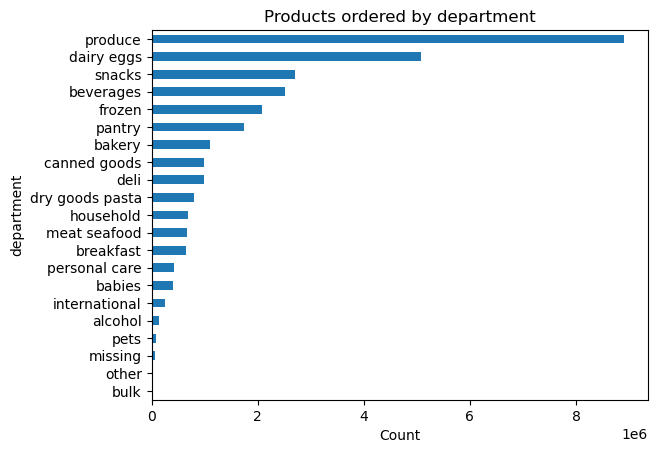

In [59]:
depts_bar = ords_prods_custs['department'].value_counts(ascending = True).plot(kind = 'barh', xlabel = 'Count', title = 'Products ordered by department')

In [60]:
# Export bar chart
depts_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'depts_bar_chart.png'))

In [61]:
# Exporting data set
ords_prods_custs.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_custs_depts.pkl'))

### Age vs Department

In [66]:
# Crosstab age group vs department
age_dept_crosstab = pd.crosstab(ords_prods_custs['age_group'], ords_prods_custs['department'], dropna = False)
age_dept_crosstab

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
age_group,,,,,,,,,,,,,,,,,,,,,
adult,41254,120668,326932,739798,194842,9696,296175,1517356,294099,238895,...,203153,75364,195278,18694,10050,518447,122830,26533,2655710,808087
middle-aged,45551,127559,344325,798411,207257,10140,309672,1584730,308192,252492,...,214812,78228,206165,19993,10610,548767,131774,27684,2780356,852125
senior,35859,103498,289707,669467,171958,8711,261950,1338952,260411,212813,...,182609,65841,177590,16591,8763,462689,108586,24775,2358423,714455
young-adult,18978,49777,137362,312072,83687,4156,123709,634864,122380,102154,...,85046,31821,82936,8236,4381,217497,51762,12110,1107074,337714


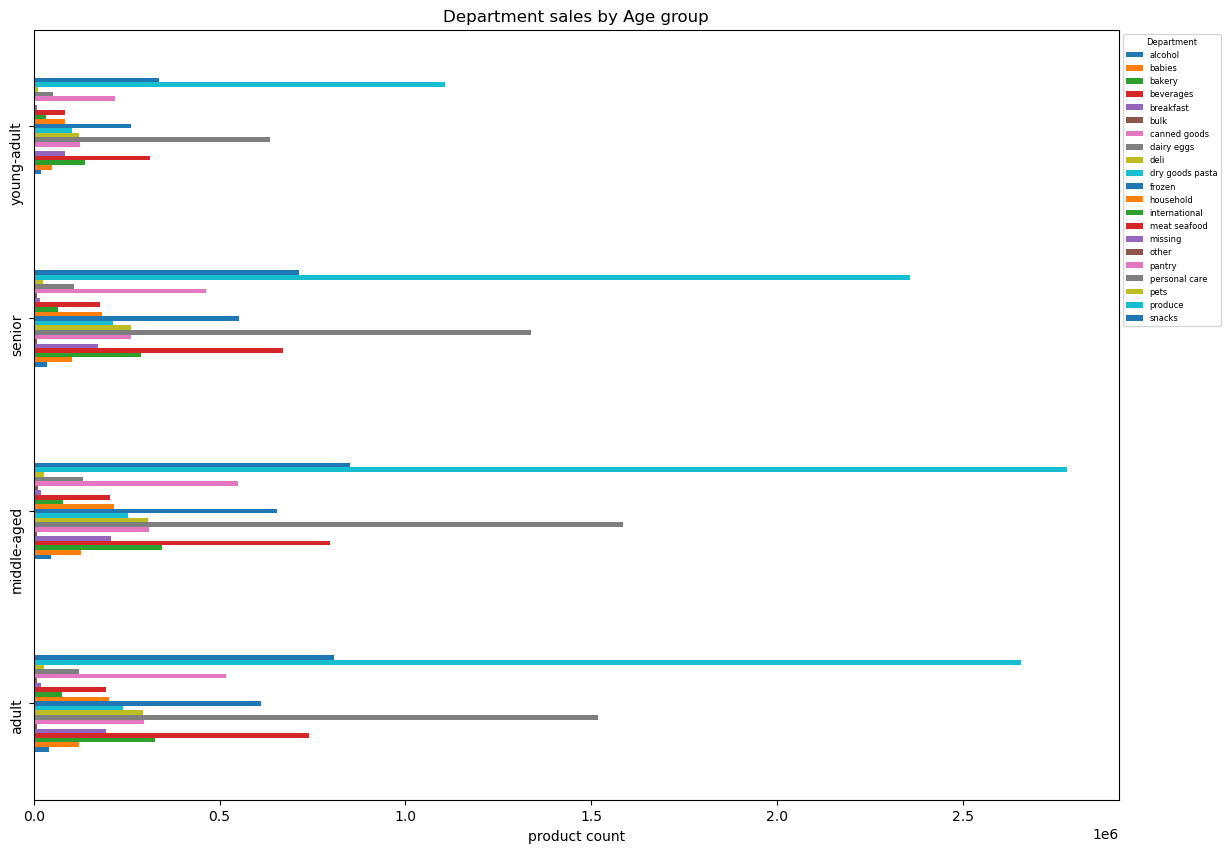

In [105]:
# Bar chart for age vs department
age_dept_bar = age_dept_crosstab.plot(kind = 'barh', figsize = (14,10))
plt.title('Department sales by Age group')
plt.xlabel('product count')
plt.ylabel('')
plt.yticks(rotation = 90)
plt.legend(title = 'Department', bbox_to_anchor = (1,1), loc= 'upper left', fontsize=6, title_fontsize=6)
plt.show()

In [107]:
# Export bar chart
age_dept_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_depts_bar_.png'))

### Income group vs department

In [70]:
# Crosstab income group vs department
inc_dept_crosstab = pd.crosstab(ords_prods_custs['income_group'], ords_prods_custs['department'], dropna = False)
inc_dept_crosstab

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
income_group,,,,,,,,,,,,,,,,,,,,,
high-income,23430,51678,145820,307303,82005,3580,130109,646409,123440,104623,...,91036,32220,89803,8100,4488,227599,52467,12698,1111301,300365
low-income,21803,42339,141483,470627,114301,5816,110631,667181,139061,90592,...,109212,29643,53795,8668,4911,221707,61741,11664,1117677,660657
middle-income,96409,307485,811023,1741818,461438,23307,750766,3762312,722581,611139,...,485372,189391,518371,46746,24405,1298094,300744,66740,6672585,1751359


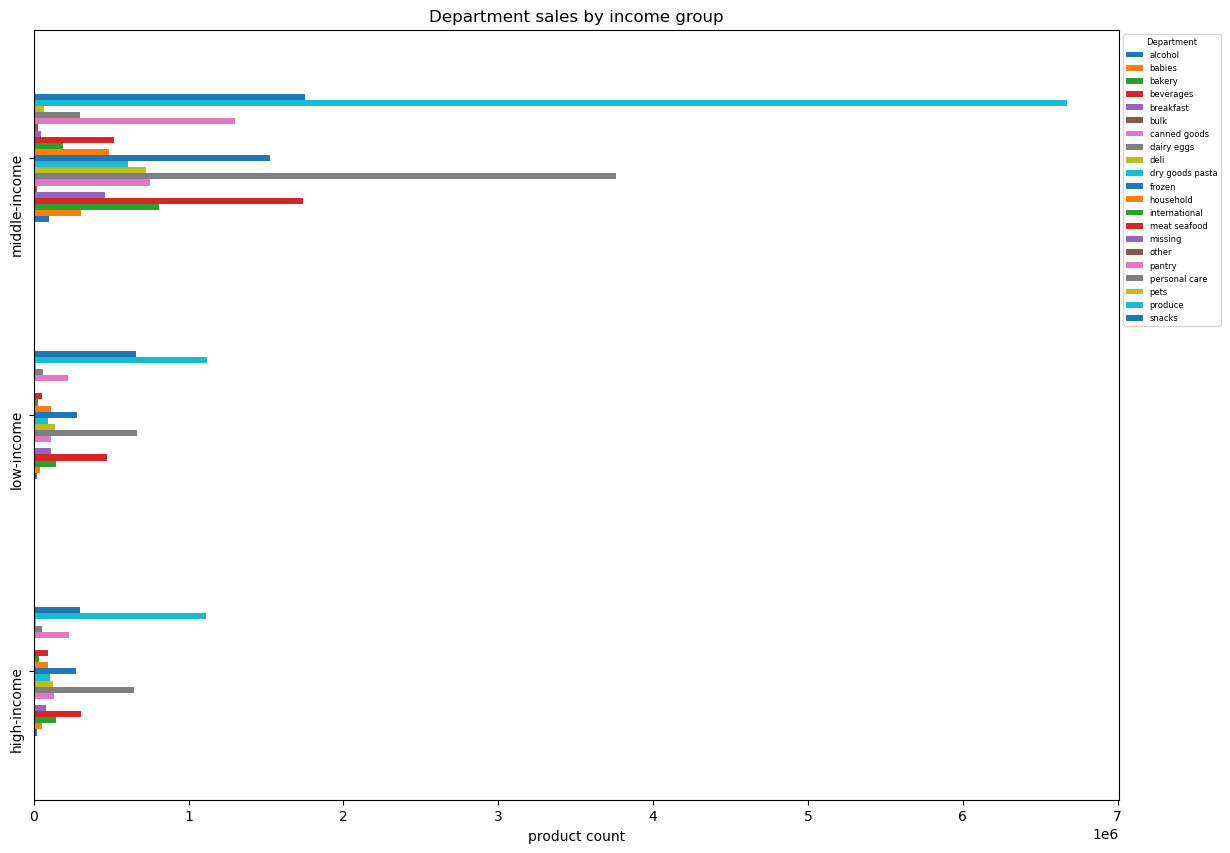

In [71]:
# Bar chart for income group vs department
inc_dept_bar = inc_dept_crosstab.plot(kind = 'barh', figsize = (14,10))
plt.title('Department sales by income group')
plt.xlabel('product count')
plt.ylabel('')
plt.yticks(rotation = 90)
plt.legend(title = 'Department', bbox_to_anchor = (1,1), loc= 'upper left', fontsize=6, title_fontsize=6)
plt.show()

In [72]:
# Export bar chart
inc_dept_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_depts_bar_chart.png'))

# 07 Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure

In [80]:
# Create a subset of customer profiles and showing the total price of each order
customer_profile = ords_prods_custs.groupby(['user_id', 
                                             'Gender',
                                             'State', 
                                             'region', 
                                             'Number of dependents', 
                                             'Family Status', 
                                             'age_group',
                                             'order_number', 
                                             'orders_day_of_week', 
                                             'order_hour_of_day',
                                             'loyalty_flag',
                                             'customer_frequency',
                                             'dependant_flag',
                                             'income_group',
                                             'spender_flag']) ['prices'].sum().reset_index()

In [81]:
customer_profile.head()

,user_id,Gender,State,region,Number of dependents,Family Status,age_group,order_number,orders_day_of_week,order_hour_of_day,loyalty_flag,customer_frequency,dependant_flag,income_group,spender_flag,prices
0,1,Female,Alabama,South,3,married,adult,1,2,8,New customer,20.5,has dependants,low-income,Low_spender,31.6
1,1,Female,Alabama,South,3,married,adult,2,3,7,New customer,20.5,has dependants,low-income,Low_spender,35.4
2,1,Female,Alabama,South,3,married,adult,3,3,12,New customer,20.5,has dependants,low-income,Low_spender,28.2
3,1,Female,Alabama,South,3,married,adult,4,4,7,New customer,20.5,has dependants,low-income,Low_spender,26.0
4,1,Female,Alabama,South,3,married,adult,5,4,15,New customer,20.5,has dependants,low-income,Low_spender,57.0


In [82]:
# Aggregate variables for customer profiles for Expenditure
exp_agg = customer_profile.groupby('user_id').agg({'order_number':['max', 'min', 'mean'], 'prices':['max', 'min', 'mean']})
exp_agg

order_number           prices                   
                 max min  mean    max    min        mean
user_id                                                 
1                 10   1   5.5   63.1   25.0   37.570000
2                 14   1   7.5  213.1   19.0  104.685714
3                 12   1   6.5  107.2   30.7   60.116667
4                  5   1   3.0   63.4   10.8   29.540000
7                 20   1  10.5  166.7    6.3   76.910000
...              ...  ..   ...    ...    ...         ...
206203             5   1   3.0  216.3  126.6  169.900000
206206            67   1  34.0  157.3    9.6   32.526866
206207            16   1   8.5  200.8   42.8  101.931250
206208            49   1  25.0  238.5   38.7  115.595918
206209            13   1   7.0  131.5   11.1   70.046154

[159422 rows x 6 columns]

In [83]:
# Aggregate variables for customer profiles for frequency
freq_agg = ords_prods_custs.groupby('user_id').agg({'order_number':['max', 'min', 'mean'], 'days_since_prior_order':['max', 'min', 'mean']})
freq_agg

order_number                days_since_prior_order                 
                 max min       mean                    max   min       mean
user_id                                                                    
1                 10   1   5.813559                   30.0   0.0  20.259259
2                 14   1   8.035897                   30.0   3.0  15.967033
3                 12   1   6.000000                   21.0   7.0  11.487179
4                  5   1   2.888889                   21.0   0.0  15.357143
7                 20   1   9.645631                   30.0   2.0  13.546392
...              ...  ..        ...                    ...   ...        ...
206203             5   1   2.983193                   30.0  27.0  29.103093
206206            67   1  38.007018                   15.0   0.0   4.042705
206207            16   1   8.116592                   30.0   1.0  14.879397
206208            49   1  25.505170                   20.0   0.0   7.442105
206209            13   1   6.937984                   30.0   3.0  20.275862

[159422 rows x 6 columns]

# 08 and 09 Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important. Produce suitable charts to illustrate your results and export them in your project folder.

### Region vs Department

In [87]:
# Crosstab region vs department
region_dept_crosstab = pd.crosstab(ords_prods_custs['region'], ords_prods_custs['department'],dropna = False)
region_dept_crosstab

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
region,,,,,,,,,,,,,,,,,,,,,
Midwest,34043,95741,261753,598979,156155,7929,237459,1212490,234464,193463,...,166992,60666,158260,15563,7983,420334,100398,21358,2134115,645143
Northeast,25017,72712,199300,462929,117904,5599,176936,914616,178398,143817,...,124604,44678,118571,11512,6268,312731,74765,17734,1593004,493154
South,45828,130621,349118,807266,210066,10432,316890,1621736,314868,257031,...,215824,79912,211308,20533,10972,556449,133142,27951,2849766,862755
West,36754,102428,288155,650574,173619,8743,260221,1327060,257352,212043,...,178200,65998,173830,15906,8581,457886,106647,24059,2324678,711329


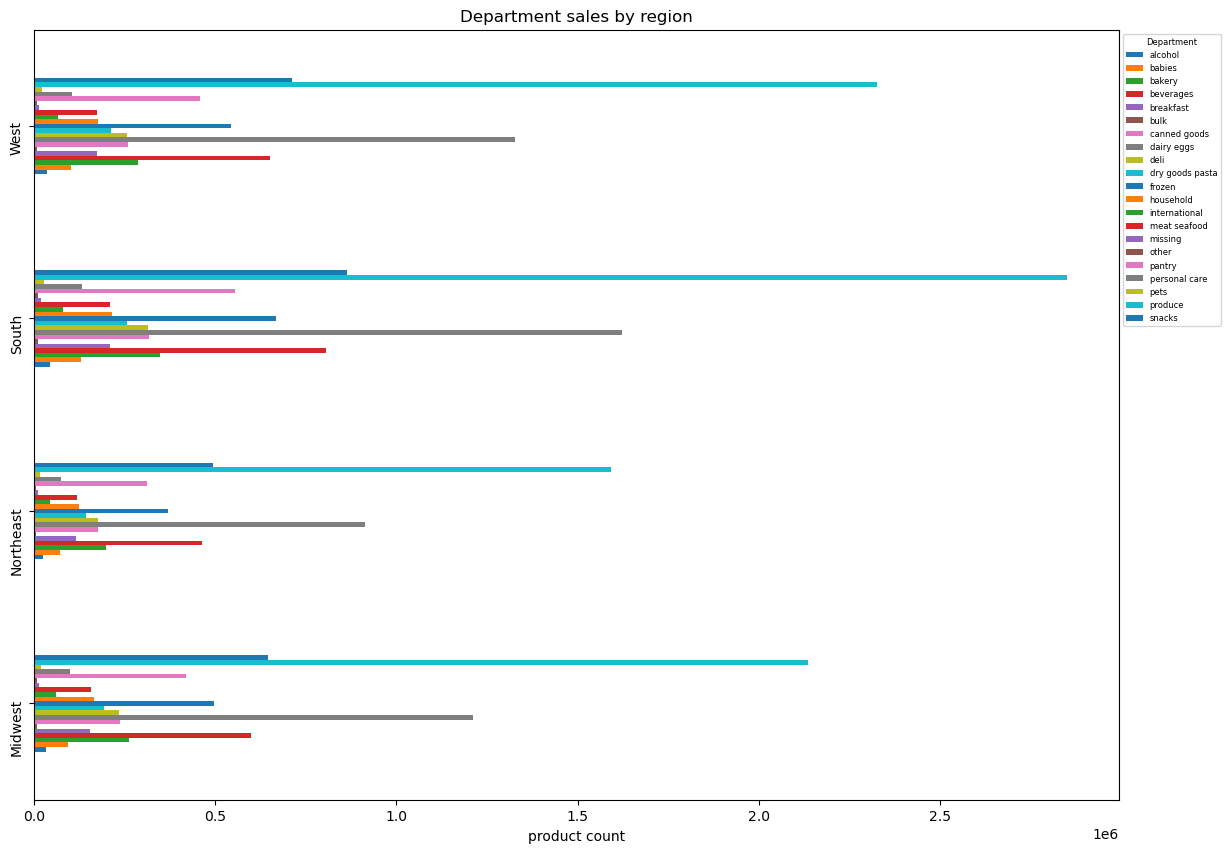

In [90]:
# Bar chart for region vs department
region_dept_bar = region_dept_crosstab.plot(kind = 'barh', figsize = (14,10))
plt.title('Department sales by region')
plt.xlabel('product count')
plt.ylabel('')
plt.yticks(rotation = 90)
plt.legend(title = 'Department', bbox_to_anchor = (1,1), loc= 'upper left', fontsize=6, title_fontsize=6)
plt.show()

In [109]:
# Export bar chart
region_dept_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'region_dept_bar_chart.png'))

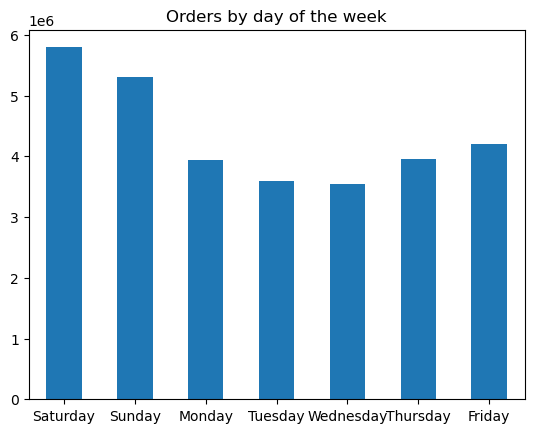

In [123]:
# Bar cahrt orders by day of week
orders_dow_bar = ords_prods_custs['orders_day_of_week'].value_counts().sort_index().plot( kind = 'bar', title = 'Orders by day of the week', rot = 0)
orders_dow_bar.set_xticklabels(['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'], rotation = 0)
orders_dow_bar.set_xlabel("")
plt.show()

In [125]:
# Export bar chart
orders_dow_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'orders_dow_bar_chart.png'))

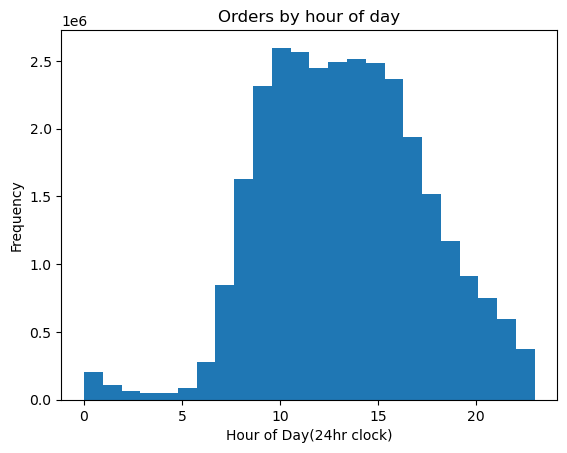

In [127]:
# Histogram of hours of the day
hod_hist = ords_prods_custs['order_hour_of_day'].plot.hist(bins = 24)
plt.title('Orders by hour of day')
plt.xlabel('Hour of Day(24hr clock)')
plt.show()

In [129]:
# Export histogram
hod_hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hod_hist.png'))

In [131]:
# Crosstab loyalty with age group
loyalty_income_cross = pd.crosstab(ords_prods_custs['loyalty_flag'], ords_prods_custs['income_group'], dropna = False)
loyalty_income_cross

income_group,high-income,low-income,middle-income
loyalty_flag,,,
Loyal customer,1286456,1354369,7442852
New customer,564693,781574,3364734
Regular customer,1968409,2229670,11362453


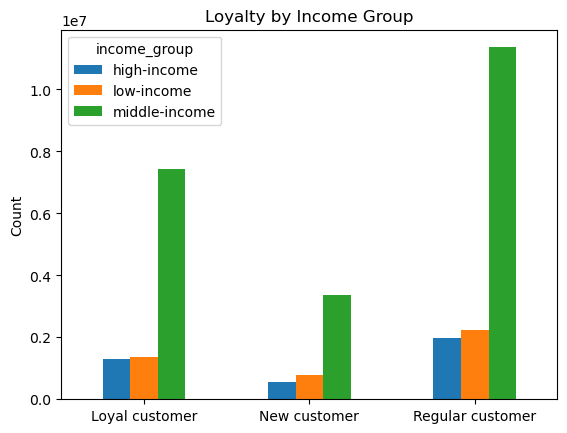

In [135]:
# bar chart
loyalty_income_bar = loyalty_income_cross.plot.bar()
plt.title('Loyalty by Income Group')
plt.xlabel('')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [137]:
# Export the chart
loyalty_income_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_income_group_bar_chart.png'))

In [139]:
# Crosstab loyalty with spending
loyalty_spender_cross = pd.crosstab(ords_prods_custs['loyalty_flag'], ords_prods_custs['spender_flag'], dropna = False)
loyalty_spender_cross

spender_flag,High_spender,Low_spender
loyalty_flag,,
Loyal customer,13579,10070098
New customer,35563,4675438
Regular customer,46189,15514343


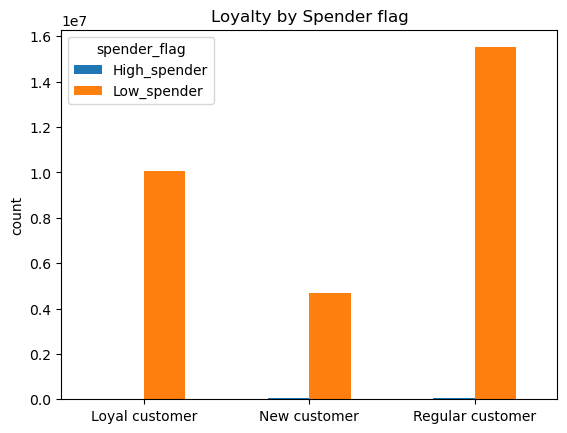

In [141]:
# bar chart
loyalty_spender_bar = loyalty_spender_cross.plot.bar()
plt.title('Loyalty by Spender flag')
plt.xlabel('')
plt.ylabel('count')
plt.xticks(rotation=0)
plt.show()

In [143]:
# Export the chart
loyalty_spender_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_spender_bar.png'))

In [145]:
# Crosstab loyalty with family status
loyalty_fam_cross = pd.crosstab(ords_prods_custs['loyalty_flag'], ords_prods_custs['Family Status'], dropna = False)
loyalty_fam_cross

Family Status,divorced/widowed,living with parents and siblings,married,single
loyalty_flag,,,,
Loyal customer,864802,486566,7061784,1670525
New customer,397074,217272,3314835,781820
Regular customer,1323288,753343,10946889,2537012


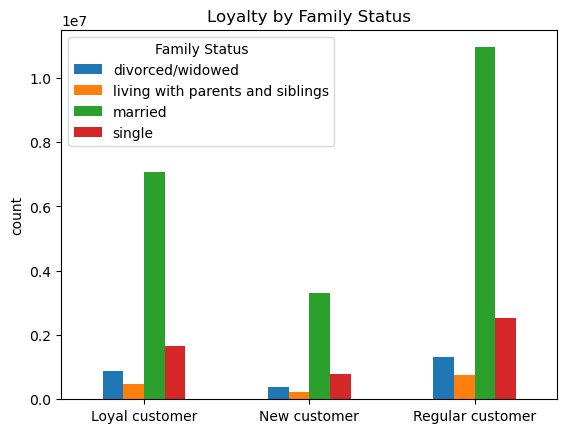

In [147]:
# bar chart
loyalty_fam_bar = loyalty_fam_cross.plot.bar()
plt.title('Loyalty by Family Status')
plt.xlabel('')
plt.ylabel('count')
plt.xticks(rotation=0)
plt.show()

In [149]:
# Export the chart
loyalty_fam_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_family_status_bar_chart.png'))

In [159]:
# Crosstab loyalty with dependants
loyalty_depend_cross = pd.crosstab(ords_prods_custs['loyalty_flag'], ords_prods_custs['dependant_flag'], dropna = False)
loyalty_depend_cross

dependant_flag,has dependants,no dependants
loyalty_flag,,
Loyal customer,7548350,2535327
New customer,3532107,1178894
Regular customer,11700232,3860300


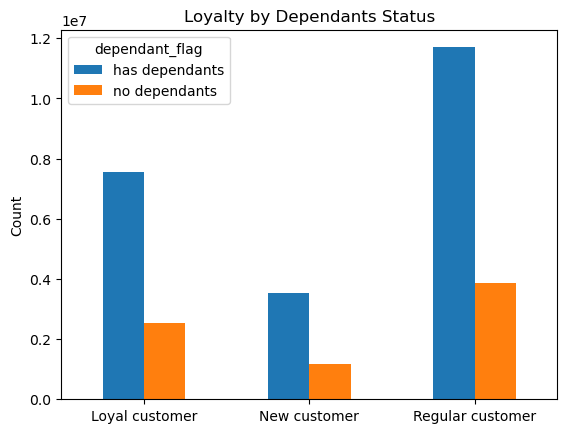

In [161]:
# bar chart
loyalty_depend_bar = loyalty_depend_cross.plot.bar()
plt.title('Loyalty by Dependants Status')
plt.xlabel('')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [163]:
# Export the chart
loyalty_depend_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_dependant_status_bar_chart.png'))

In [167]:
# Check value counts
fam_status = ords_prods_custs['Family Status'].value_counts(dropna = False)
fam_status

Family Status
married                             21323508
single                               4989357
divorced/widowed                     2585164
living with parents and siblings     1457181
Name: count, dtype: int64

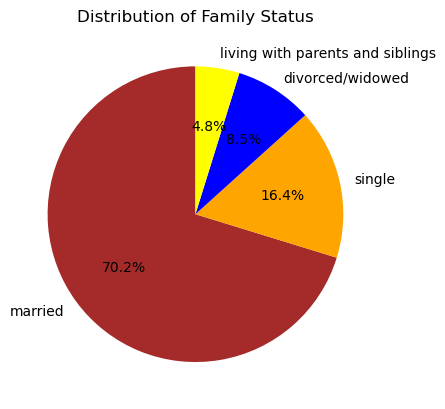

In [175]:
# Pie chart showing the distribution of family status
fam_status_pie = fam_status.plot.pie(autopct='%1.1f%%', 
                                     labels= ['married', 'single', 'divorced/widowed', 'living with parents and siblings'], 
                                     startangle=90, 
                                     colors=['brown','orange','blue','yellow'])
plt.ylabel('')
plt.title('Distribution of Family Status')
plt.show()

In [177]:
# Export the chart
fam_status_pie.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'fam_status_bar.png'))